## 00 Project Babynames 

In [1]:
#Read and write data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_2000 = pd.read_csv('yob2000.txt', names = ["FirstName","Sex","Count"])
df_2000.to_excel('copy_yob2000.xlsx',sheet_name='yob2000',index=False)
df_2000.shape
df_2000.head(10)

,FirstName,Sex,Count
0,Emily,F,25953
1,Hannah,F,23080
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17697
5,Alexis,F,17629
6,Samantha,F,17266
7,Jessica,F,15709
8,Elizabeth,F,15094
9,Taylor,F,15078


In [2]:
#Calculate total births
total_birth = df_2000['Count'].sum()
total_birth

3778079

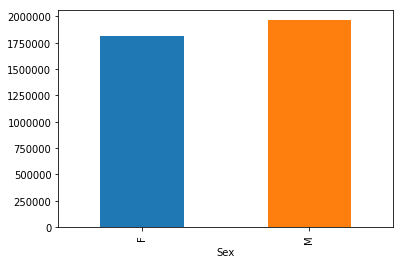

In [3]:
#Separate boys / girls
#df_m = df[df['Sex']== 'M']
df_2000_sex = df_2000.groupby('Sex')[['Count']].sum()
df_2000_sex[('Count')].plot.bar()


In [4]:
#Frequent names
df1000 = df_2000[df_2000['Count']> 1000]
df1000.shape

(617, 3)

In [5]:
#Relative amount
#Percentage
TotalBirths = df_2000['Count'].sum()
df_2000['Percentage'] = (df_2000['Count']/TotalBirths)*100
df_2000.head(5)

,FirstName,Sex,Count,Percentage
0,Emily,F,25953,0.686936
1,Hannah,F,23080,0.610892
2,Madison,F,19967,0.528496
3,Ashley,F,17997,0.476353
4,Sarah,F,17697,0.468413


In [6]:
# Verify that the sum of percentages is 100%.
df_2000['Percentage'].sum()

99.99999999999999

In [7]:
# Calculate the percentage of the top 10 names on all births
df_2000sorted = df_2000.sort_values(by=['Percentage'], ascending=False)
#df_2000sorted.groupby('Sex')['Count'].sum()

#df_2000sorted.iloc[0:10,3].sum()
df_2000sorted.head(10)['Percentage'].sum()

7.085505623360444

In [8]:
#Search your name
df_2000sorted[df_2000sorted['FirstName'] == 'Nicolas']

,FirstName,Sex,Count,Percentage
17789,Nicolas,M,2846,0.075329
16833,Nicolas,F,5,0.000132


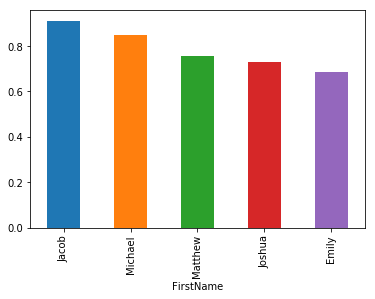

In [9]:
#Bar plot
TopFive = df_2000sorted.iloc[0:5]
TopFiveName = TopFive.set_index('FirstName')
TopFiveName[('Percentage')].plot.bar()

In [10]:
# Read all names

years = range(1880, 2018, 1)
data = []
for y in years:
    fn = f'yob{str(y)}.txt'
    df = pd.read_csv(fn, names = ["FirstName","Sex","Count"])
    df['year'] = y
    data.append(df)
    
df = pd.concat(data,ignore_index = True)

df_m = df[df['Sex']== 'M']
df_f = df[df['Sex']== 'F']

In [11]:
#Celebrities
# as agreed with Kristian this section was dropped due to the extensive Nicolas research

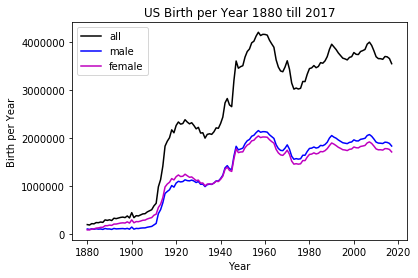

In [12]:
#Total births over time

baby_sum = df.groupby('year')[['Count']].sum()
baby_sum_m = df_m.groupby('year')[['Count']].sum()
baby_sum_f = df_f.groupby('year')[['Count']].sum()
baby_sum.plot.line(c='k')

plt.plot(baby_sum_m.index, baby_sum_m['Count'].values, color='b')
plt.plot(baby_sum_f.index, baby_sum_f['Count'].values, color='m')
plt.xlabel('Year')
plt.ylabel('Birth per Year')
plt.title('US Birth per Year 1880 till 2017')
plt.legend(('all','male','female'))

In [13]:
#Normalize
# left out, considered in Nicolas section


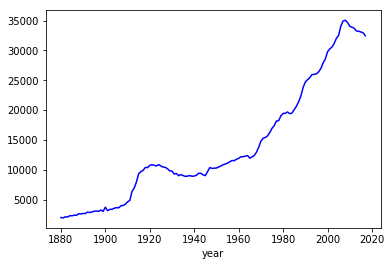

In [14]:
# Name diversity
#NiDataSum = NiData.groupby('FirstName')['Count'].sum() 
diversity = df.groupby('year')['FirstName'].size()
diversity.plot.line(c='b')

#looking at the graph below it seems that the diversity in names has increased. 
# This could be due to the fact that the USA is - due to the current political situation one might say was -
# a country of immigration. Immigrants form different regions of the word, bring different 
# however one should also consider that some of the increase might be due to the fact that 
# there are more "versions" of some names (e.g. Nicolas, Nicholas, Nikolas)

In [15]:
# Long name
def LengthName(l):
    return len(l)

df['Length'] = df['FirstName'].apply(LengthName)
df.sort_values(by=['Length'], ascending=False).head(10)

# more simple
# do not create LengthName-function and simply use:
df['Length'] = df['FirstName'].apply(len)
df.sort_values(by=['Length'], ascending=False).head(10)


,FirstName,Sex,Count,year,Length
1273784,Christopherjame,M,6,1997,15
1485009,Christianmichae,M,5,2004,15
1011480,Mariadelosangel,F,7,1987,15
1331306,Christianjoseph,M,5,1999,15
1033393,Mariadelosangel,F,7,1988,15
939066,Christopherjohn,M,8,1983,15
1422999,Ryanchristopher,M,5,2002,15
1824466,Christopherjohn,M,5,2014,15
1143663,Christopherjohn,M,5,1992,15
1485010,Christopherdavi,M,5,2004,15


In [16]:
# First letter statistics
def FirstLetter(m):
    return m[0]

diversity = df.groupby('FirstName').sum()
diversity2 = diversity.reset_index()
diversity2.head(5)

diversity2['First Letter'] = diversity2['FirstName'].apply(FirstLetter)
diversity2.head(5)
FirstLetterTotal = diversity2.groupby('First Letter').size()
#Starting with A:
FirstLetterTotal[0]

10292

In [17]:
#df.sort_values(by=['FirstName'], ascending=True).head(5)
#diversity = df.groupby('FirstName').sum()
#groupby('First Letter').size()
df['First Letter'] = df['FirstName'].apply(FirstLetter)
df.sort_values(by=['FirstName'], ascending=True).head(5)
diversity3 = df.sort_values(by=['year','First Letter'], ascending=[True,True] )
diversity3.head(5)

,FirstName,Sex,Count,year,Length,First Letter
1,Anna,F,2604,1880,4,A
7,Alice,F,1414,1880,5,A
10,Annie,F,1258,1880,5,A
32,Ada,F,652,1880,3,A
53,Agnes,F,473,1880,5,A


In [18]:
diversity4 = diversity3.groupby(['year','First Letter'])[['Count']].sum()
diversity4.reset_index()
diversity5 = diversity4.sort_values(['First Letter','year'], ascending=True)
diversity5.reset_index(inplace = True)
diversity5.head(5)
#diversity3 = df.gr-oupby('First Letter')['Count']
#diversity3.head(3)

,year,First Letter,Count
0,1880,A,16740
1,1881,A,16257
2,1882,A,18790
3,1883,A,18831
4,1884,A,20898


In [19]:
baby_sum.reset_index(inplace = True)
rel_baby = pd.merge(diversity5,baby_sum, how = 'left', on ='year')
rel_baby['Percentage'] = (rel_baby['Count_x']/rel_baby['Count_y'])*100 
rel_baby.head(5)

,year,First Letter,Count_x,Count_y,Percentage
0,1880,A,16740,201484,8.308352
1,1881,A,16257,192696,8.436605
2,1882,A,18790,221533,8.481806
3,1883,A,18831,216946,8.680040
4,1884,A,20898,243462,8.583680


In [20]:
import numpy
import string

Alphabet = list(string.ascii_uppercase)
#The problem encountered here is that in some years there no babies named a name starting with X
Alphabet = Alphabet[0:23] + Alphabet[24:26 ]
StdDiv_Vector = []
VolatilityDict = {}

for x in Alphabet: 
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    StdDiv = numpy.std(InitialsOverTime['Percentage'].values)
    #StdDiv_Vector.append(StdDiv)  
 #   StdDiv_Vector[]
    VolatilityDict[x]=StdDiv
#    Alphabet :StdDiv_Vector
#VolList = [Alphabet, StdDiv_Vector ]
VolDF = pd.DataFrame(list(VolatilityDict.items()),columns = ['Letter', 'Volatility'])
Vol_sort = VolDF.sort_values('Volatility')

In [21]:
Vol_sort_low = Vol_sort[0:8]
Vol_sort_medium = Vol_sort[8:17]
Vol_sort_high = Vol_sort[17:]

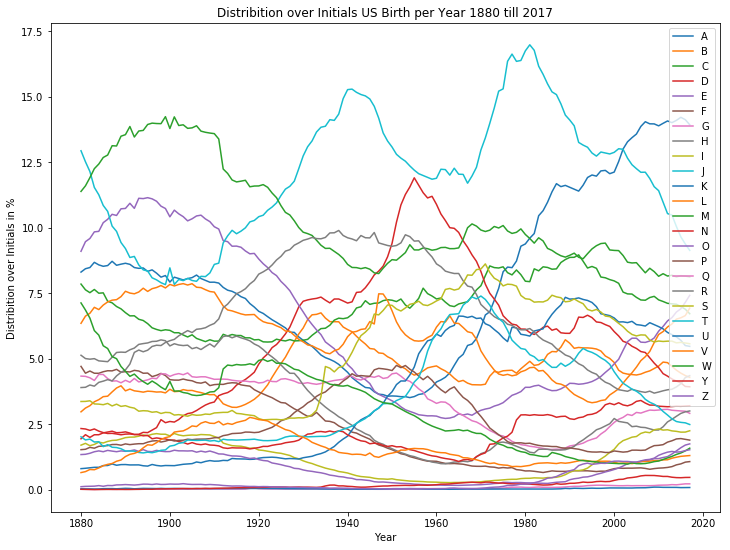

In [22]:
plt.figure(figsize=(12,9) )
for x in Alphabet: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['year'], InitialsOverTime['Percentage'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials in %')
#plt.axis([ 1880, 2020,0, 16])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017')
plt.legend(Alphabet)


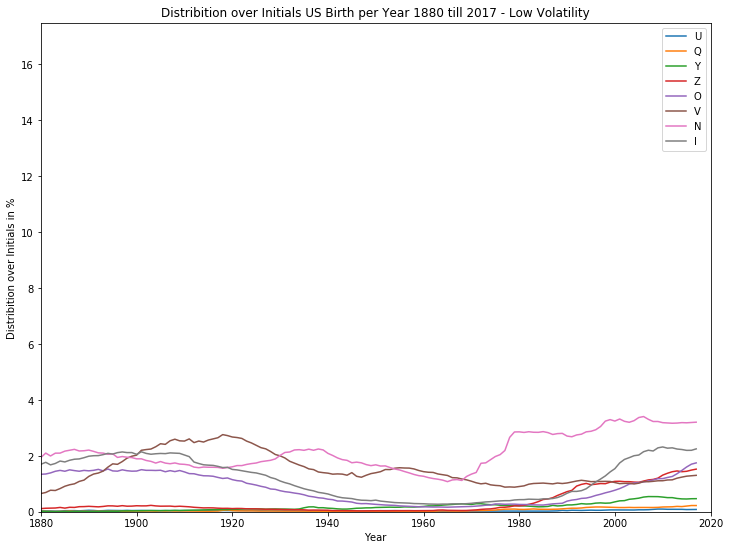

In [23]:
plt.figure(figsize=(12,9) )
for x in Vol_sort_low['Letter']: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['year'], InitialsOverTime['Percentage'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials in %')
plt.axis([ 1880, 2020,0, 17.5])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017 - Low Volatility')
plt.legend(Vol_sort_low['Letter'])
#plt.savefig('Distribition over Initials US Birth per Year 1880 till 2017')

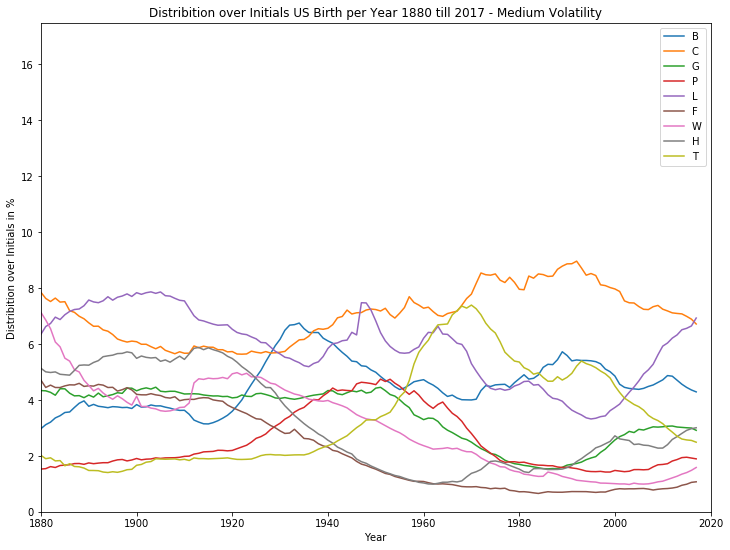

In [24]:
plt.figure(figsize=(12,9) )
for x in Vol_sort_medium['Letter']: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['year'], InitialsOverTime['Percentage'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials in %')
plt.axis([ 1880, 2020,0, 17.5])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017 - Medium Volatility')
plt.legend(Vol_sort_medium['Letter'])

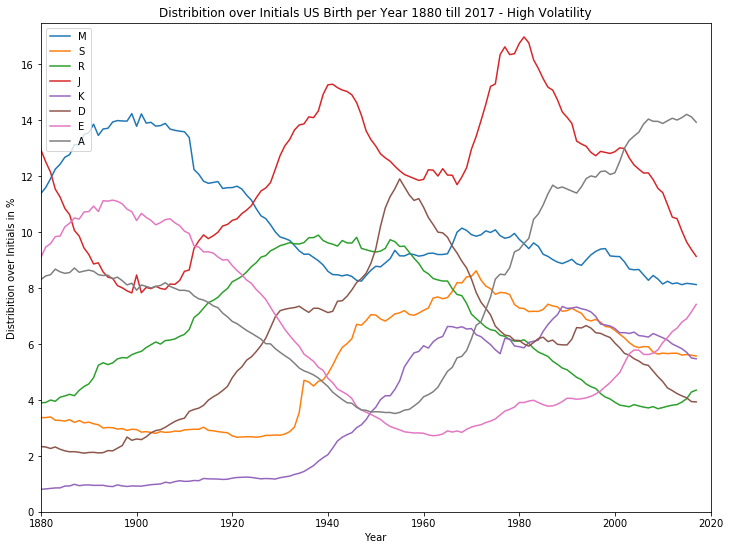

In [25]:
plt.figure(figsize=(12,9) )
for x in Vol_sort_high['Letter']: 
    #try:
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    #InitialsOverTime['Percentage']
    plt.plot(baby_sum['year'], InitialsOverTime['Percentage'].values,) #, color='b') figsize=(7)
    #except:
    #    continue
plt.xlabel('Year')
plt.ylabel('Distribition over Initials in %')
plt.axis([ 1880, 2020,0, 17.5])
plt.title('Distribition over Initials US Birth per Year 1880 till 2017 - High Volatility')
plt.legend(Vol_sort_high['Letter'])

In [26]:
import numpy as np
#note that 
#MeanDict = {}
MeanVec = []
#twentiesix = range(1,26,1)
for x in Alphabet: 
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    Mean = np.mean(InitialsOverTime['Percentage'].values)
    MeanVec.append(Mean)
#create vector     
VolDF['Average'] = MeanVec

MaxVec = []
#twentiesix = range(1,26,1)
for x in Alphabet: 
    InitialsOverTime = rel_baby[rel_baby['First Letter'] == x]
    Max = np.max(InitialsOverTime['Percentage'].values)
    MaxVec.append(Max)
    
VolDF['Max'] = MaxVec
#help

In [27]:
VolDF

,Letter,Volatility,Average,Max
0,A,3.185776,8.070145,14.216766
1,B,0.888491,4.565173,6.751434
2,C,0.957033,7.038101,8.965766
3,D,2.603885,5.894356,11.908075
4,E,2.875653,6.292500,11.148874
5,F,1.503041,2.259636,4.708066
6,G,0.978135,3.437221,4.457866
7,H,1.717198,3.202850,5.879461
8,I,0.733177,1.205612,2.319885
9,J,2.403456,12.020140,16.985345


In [28]:
# note that that the 
# while a non-low Max Value is necessary for a high volatility 
# this dues not hold the other way around, that is to say a initial letter could have a constant value 
#of e.g. 12% over each year  and would thus have a high Max and Average value, but a low volatility
#np.correlate(VolDF['Volatility'],VolDF['Average'],VolDF['Max'])
VolDF.corr()

,Volatility,Average,Max
Volatility,1.000000,0.741336,0.868747
Average,0.741336,1.000000,0.967058
Max,0.868747,0.967058,1.000000


In [29]:
#for x in Alphabet:
#    test = rel_baby[rel_baby['First Letter'] == x]
#    print(len(InitialsOverTime['Percentage']))

#rel_baby[rel_baby['First Letter'] == 'X']
#Alphabet[0:23] + Alphabet[24:26 ]

In [30]:
# Last letter statistics

def LastLetter(m):
    return m[-1]

LastLetter('abcde')
df['Last Letter'] = df['FirstName'].apply(LastLetter)
df.sort_values(by=['Last Letter'] , ascending=True).head(5)

,FirstName,Sex,Count,year,Length,First Letter,Last Letter
962332,Francisca,F,153,1985,9,F,a
444769,Virgina,F,11,1948,7,V,a
1126626,Hera,F,12,1992,4,H,a
1126625,Haya,F,12,1992,4,H,a
1126624,Haruka,F,12,1992,6,H,a


In [31]:
# e-rich Names
def CountNumberOfE(a):
    p = a.count('E')
    o = a.count('e')
    ##Eevector = ['E' ,'e']
    #Eevector2 = '|'.join(Eevector)
    return p + o

diversity2['NumberOfE'] = diversity2['FirstName'].apply(CountNumberOfE)
Min4E = diversity2[diversity2['NumberOfE']>3]
len(Min4E)

136

# Nicolas Statistics

In [185]:
from IPython.display import Image


#### What do all these men have in common?

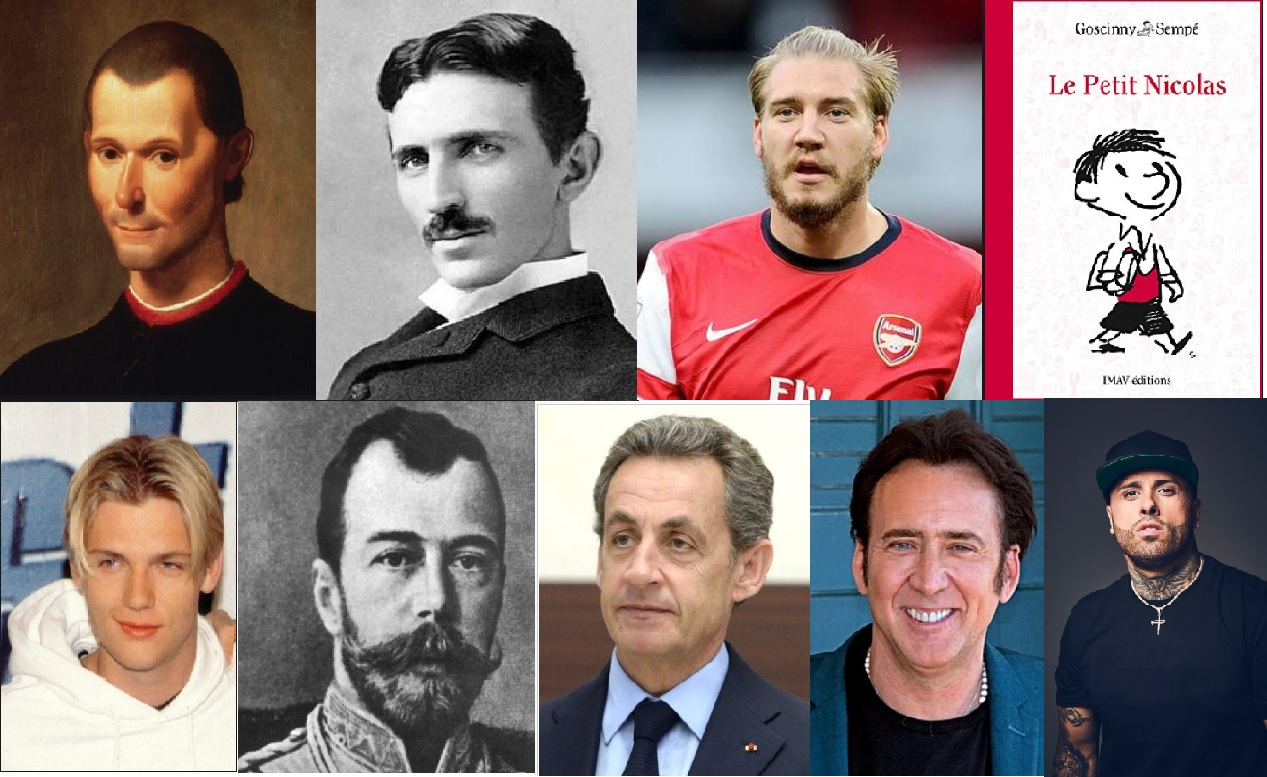

In [186]:
Image(filename = "All_nicolas.jpg") 
#copyright by Wikipedia

#### Since there are many version to write my first name 'Nicolas', as seen in the photo e.g. 'Nicholas', 'Nick', Niclas, instead of my name, I analyzed all versions from the name family

In [175]:
import webbrowser
webbrowser.open('https://en.wikipedia.org/wiki/Nicholas#Male_variations')
#from PIL import Image 
#myImage = Image.open("Nicolas_family.jpg") #("C:\Users\User\Documents\Spiced Academy\names\fotos\Nicolas_family.jpg")
#myImage.show()

True

#### For my analysis, I use a more narrow definition : to be considered as a Nicolas it has to start with Nic or Nik

In [33]:
import re
def Matching_ni(fn):
    pattern1 = r"^Nic.*"
    pattern2 = r"^Nik.*"
    nivector = [pattern1 ,pattern2]
    nivector2 = '|'.join(nivector)
#    print(nivector2)
    if re.match(nivector2,fn):
        return True
    else:
        return False 
    
# both sexes
NiData_all = df[df['FirstName'].apply(Matching_ni)]
# male
NiData_m = df_m[df_m['FirstName'].apply(Matching_ni)]
# female
NiData_f = df_f[df_f['FirstName'].apply(Matching_ni)]
#df.apply(re.match(pattern1,df['FirstName']))
NiData_all.head(5)

,FirstName,Sex,Count,year,Length,First Letter,Last Letter
1119,Nicholas,M,73,1880,8,N,s
1210,Nick,M,40,1880,4,N,k
3141,Nicholas,M,56,1881,8,N,s
3192,Nick,M,39,1881,4,N,k
5158,Nicholas,M,66,1882,8,N,s


In [34]:
NiData_m.shape

(4090, 4)

### List of different versions of Nicolas

In [35]:
import numpy as np
NiData_m['FirstName'].unique()

array(['Nicholas', 'Nick', 'Nickolas', 'Nicolas', 'Nicola', 'Nicanor',
       'Nichols', 'Nickie', 'Nicklas', 'Nicolo', 'Nicholos', 'Nicklos',
       'Nicky', 'Nicandro', 'Nickey', 'Nickolaus', 'Nicodemus', 'Nickles',
       'Nickoles', 'Nicasio', 'Nikolas', 'Nicki', 'Nikki', 'Niki',
       'Nickola', 'Nicholaus', 'Nicholes', 'Nichlos', 'Nicholis',
       'Nikolaus', 'Nicomedes', 'Nikita', 'Nico', 'Nikolai', 'Nicolaas',
       'Nikola', 'Nic', 'Nicole', 'Nikolaos', 'Nicolai', 'Nicholai',
       'Niko', 'Nikos', 'Nicholus', 'Nicklaus', 'Nik', 'Nicklous',
       'Nicholaos', 'Nicol', 'Nichol', 'Nickolaos', 'Nikhil', 'Nicolaos',
       'Nicolaus', 'Nichole', 'Nichael', 'Nikko', 'Nikitas', 'Nichalos',
       'Nikia', 'Nichola', 'Niclas', 'Nikesh', 'Nichlas', 'Nickalas',
       'Nickalus', 'Nickolai', 'Nickalaus', 'Niklas', 'Nikkia',
       'Nichalas', 'Nickolus', 'Nicolino', 'Nicholous', 'Nickalous',
       'Nickolous', 'Nichalaus', 'Nichlous', 'Nichlaus', 'Nickalos',
       'Nickolos', 'N

### most popular versions over the entire sample

In [36]:
NiDataSum = NiData_m.groupby('FirstName')['Count'].sum() 
NiDataSum2 = NiDataSum.reset_index()
NiDataSum2
NiDataDistSort = NiDataSum2.sort_values(by=['Count','FirstName'], ascending=False)
NiDataDistSort.head(11)

,FirstName,Count
31,Nicholas,895397
100,Nicolas,85430
44,Nick,49379
75,Nickolas,38001
157,Nikolas,20499
90,Nico,10400
87,Nicky,7367
150,Niko,6999
154,Nikolai,6787
130,Nikhil,4925


#### Given that there is a long tail of Nic/Nik Versions which do not occure that often, all versions from 6th to last place are grouped into 'other Versions'

In [38]:
NiDataDistSort2 = NiDataDistSort['Count'].iloc[5:].sum()
OtherVer = [[ "other Versions" , NiDataDistSort2]]
# put other versions aggregate into DF format 
OtherVerDF = pd.DataFrame(OtherVer, columns = ['FirstName','Count'] ,index = ['9'])
# include into Nic/Nik DF
NiFinal = pd.concat([NiDataDistSort[:5],OtherVerDF])
# sort DF again
NiFinal2 = NiFinal.sort_values(by=['Count','FirstName'], ascending=False)
#get vector containing Names
NiTopFive = NiFinal2['FirstName'].head(6).values
NiTopFive

array(['Nicholas', 'other Versions', 'Nicolas', 'Nick', 'Nickolas',
       'Nikolas'], dtype=object)

### Distribution of versions of Nicolas

Text(0.5, 1.0, 'Distribition of Nicolas')

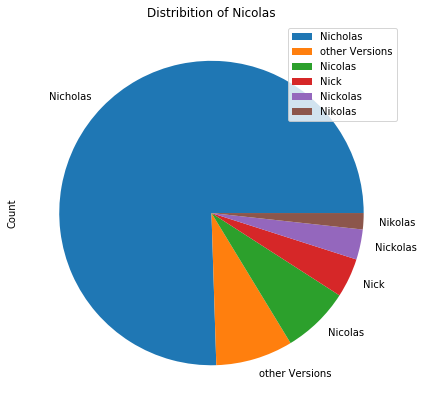

In [40]:
NiFinal2.plot.pie(y='Count', figsize=(7, 7), labels = (NiTopFive) )
plt.legend(NiTopFive) 
plt.title('Distribition of Nicolas')

Text(0.5, 1.0, 'Distribition of Nicolas')

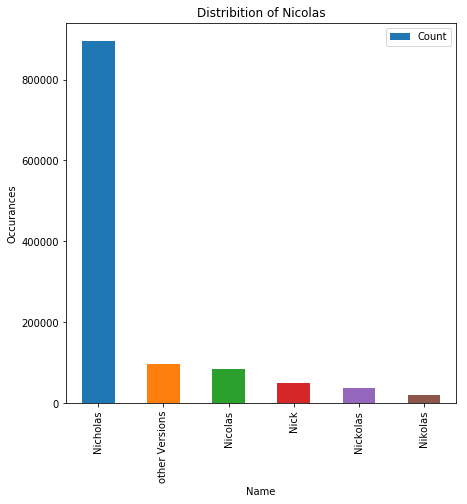

In [41]:
# same as a bar diagramm    
NiFinal2.plot.bar(y='Count', figsize=(7, 7))
#plt.legend(NiTopFive)
#plt.xticks(NiTopFive)
plt.xticks(np.arange(6), NiTopFive)
plt.xlabel('Name')
plt.ylabel('Occurances')
plt.title('Distribition of Nicolas')

### Occurance of Nicolas in different version

In [42]:
# Top 5 Nic-Nik names
NiTopFiveVector = ['Nicholas',  'Nicolas', 'Nick', 'Nickolas', 'Nikolas']
def Notmatching_ni(fn):
    patternA = r"Nicholas"
    patternB = r"Nicolas"
    patternC = r"Nick"
    patternD = r"Nickolas"
    patternE = r"Nikolas"
    NiTopFiveVector = [patternA ,patternB, patternC, patternD, patternE ]
    NiTopFiveVector2 = '|'.join(NiTopFiveVector)
#    print(nivector2)
    if re.match(NiTopFiveVector2,fn):
        return False
    else:
        return True 

    # both sexes
#NiData_all = NiData_m[NiData_m['FirstName'].apply(Notmatching_ni)]
Ni_otherVer = NiData_m[NiData_m['FirstName'].apply(Notmatching_ni)]
Ni_otherVer_2 = Ni_otherVer.groupby('year')[['Count']].sum()
Ni_otherVer_2['FirstName'] = "other Versions"
Ni_otherVer_2.head(5)

,Count,FirstName
year,,
1908,6,other Versions
1910,5,other Versions
1911,6,other Versions
1912,17,other Versions
1913,20,other Versions


#### Occurrance of all versions of Nic/Nik over time

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik')

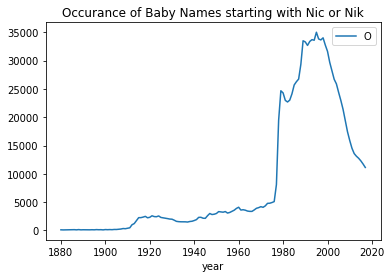

In [43]:
#All Ni
Ni_sum = NiData_m.groupby('year')[['Count']].sum()
Ni_sum2 = Ni_sum.reset_index()
#Ni_sum2.tail(10)
Ni_sum2.plot.line('year', 'Count')
plt.legend('Occurance')
plt.title('Occurance of Baby Names starting with Nic or Nik')


#### Occurrance of Top 5 Nic/Nik and other Versions over time

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik')

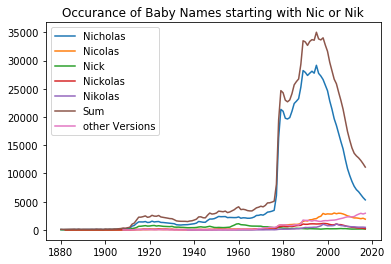

In [45]:
# Top 5 Nic-Nik names
All_Ni_Name = NiTopFiveVector + ['Sum'] + ['other Versions']  
for n in NiTopFiveVector:
  #  NiName =a NiTopFiveVector[n]
    NiDF = NiData_m[NiData_m['FirstName']== n ]
    plt.plot(NiDF['year'], NiDF['Count'].values )
    #NiData.append(NiDF)
plt.plot(Ni_sum2['year'], Ni_sum2['Count'].values)   
plt.plot(Ni_otherVer_2['year'], Ni_otherVer_2['Count'])
#lt.plot(Ni_otherVer_2['year'], Ni_otherVer_2['Count'].values)
plt.legend(All_Ni_Name)
plt.title('Occurance of Baby Names starting with Nic or Nik')

#### Occurrance of other Versions of Nicolas (e.g. not top 5 versions)

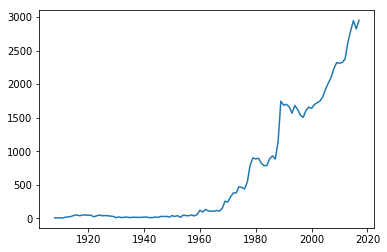

In [44]:
Ni_otherVer_2.reset_index(inplace = True)
Ni_otherVer_2.iloc[90:120,:]

# percentage change of others 
plt.plot(Ni_otherVer_2['year'], Ni_otherVer_2['Count'])

### Percentage Change

Text(0.5, 1.0, 'Sum')

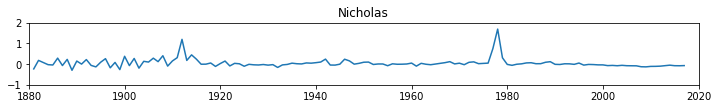

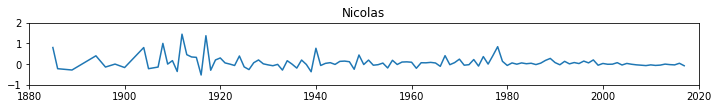

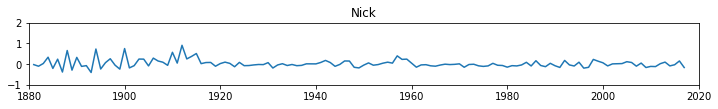

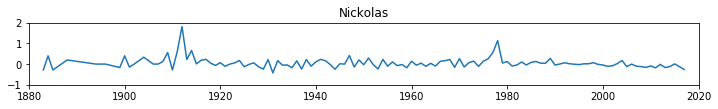

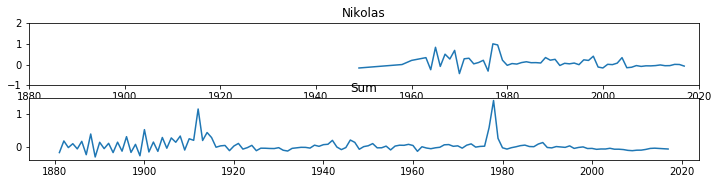

In [106]:
NicPerCent = Ni_sum2['Count'].pct_change()
for i,n in enumerate(NiTopFiveVector):
  #  NiName = NiTopFiveVector[n]
    NiDF = NiData_m[NiData_m['FirstName']== n ]
    NiDFPerCent = NiDF['Count'].pct_change()
    plt.figure(figsize=(12,8) )
    plt.subplot(6,1,i+1)
    plt.axis([ 1880, 2020,-1, 2])
    plt.plot(NiDF['year'],NiDFPerCent.values   )
    plt.title(NiTopFiveVector[i]) 
plt.subplot(6,1,6)
plt.plot(Ni_sum2['year'], NicPerCent)   
plt.title('Sum')

#### Which year is the peak of growth in Nicholas?

In [179]:
#max valueof each graph and corresponding year!!
#Ni_sum2['Count']
#list(NicPerCent.index)
MaxValue = NicPerCent.max()
for i, j in enumerate(NicPerCent.values):
    if j == MaxValue:
        print (i)

98


In [55]:
Ni_sum2.iloc[98,:]

year      1978
Count    19465
Name: 98, dtype: int64

#### Thus: the year of the steep increase is 1978


### Percentage of Nic/Nik of US population ( all different versions of Nic/Nik as % of entire population)

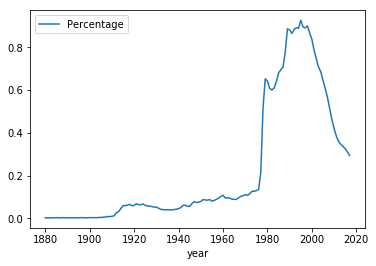

In [56]:
# looking at the relative distribution to check how the name Nicolas 
#normalization
Ni_sum2['Percentage'] = (Ni_sum2['Count']/TotalBirths)*100
Ni_sum2.plot.line('year', 'Percentage')

### check for top 5 male Nic/Nik versions in female data set

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik in female data set')

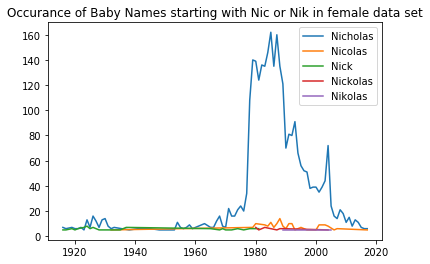

In [57]:
NicNikFemale = []
for n in NiTopFiveVector:
  #  NiName = NiTopFiveVector[n]
    NiDF_f = NiData_f[NiData_f['FirstName']== n ]
    plt.plot(NiDF_f['year'], NiDF_f['Count'].values )
    NicNikFemale.append(NiDF_f)
#plt.plot(Ni_sum2['year'], Ni_sum2['Count'].values)   
#plt.plot(Ni_otherVer_2['year'], Ni_otherVer_2['Count'])
#lt.plot(Ni_otherVer_2['year'], Ni_otherVer_2['Count'].values)
plt.legend(NiTopFiveVector)
plt.title('Occurance of Baby Names starting with Nic or Nik in female data set')

In [58]:
NicNikFemale[0:20]

[        FirstName Sex  Count  year
 132897   Nicholas   F      7  1916
 143229   Nicholas   F      6  1917
 163226   Nicholas   F      7  1919
 174270   Nicholas   F      6  1920
 185141   Nicholas   F      6  1921
 195389   Nicholas   F      7  1922
 207320   Nicholas   F      5  1923
 215239   Nicholas   F     13  1924
 227653   Nicholas   F      7  1925
 236297   Nicholas   F     16  1926
 247245   Nicholas   F     12  1927
 258906   Nicholas   F      7  1928
 267536   Nicholas   F     13  1929
 277204   Nicholas   F     14  1930
 288016   Nicholas   F      8  1931
 298189   Nicholas   F      6  1932
 306940   Nicholas   F      7  1933
 353164   Nicholas   F      5  1938
 379556   Nicholas   F      6  1941
 398325   Nicholas   F      6  1943
 416732   Nicholas   F      6  1945
 447231   Nicholas   F      5  1948
 457481   Nicholas   F      5  1949
 499644   Nicholas   F      5  1953
 507841   Nicholas   F     11  1954
 520215   Nicholas   F      7  1955
 532032   Nicholas   F      

### state level data

In [59]:
# import list containing all state data
USstates = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
len(USstates)

51

In [60]:
# Breaking it down on country level
years = range(1880, 2018, 1)
statedata = []
for u in USstates:
    fn = f'{str(u)}.txt'
#    for y in years:
    stateDF = pd.read_csv(fn, names = ["Sex",'Year',"FirstName","Count"])
    stateDF['State'] = u
    #statedf['year'] = y
    statedata.append(stateDF)

stateDF = pd.concat(statedata,ignore_index = True)

stateDF_m = stateDF[stateDF['Sex']== 'M']
stateDF_f = stateDF[stateDF['Sex']== 'F']
stateDF.head(5)

,Sex,Year,FirstName,Count,State
0,F,1910,Mary,875,AL
1,F,1910,Annie,482,AL
2,F,1910,Willie,257,AL
3,F,1910,Mattie,232,AL
4,F,1910,Ruby,204,AL


In [61]:
stateDF_f.tail(5)

,Sex,Year,FirstName,Count,State
5919765,F,2017,Shelby,5,WY
5919766,F,2017,Taylor,5,WY
5919767,F,2017,Violet,5,WY
5919768,F,2017,Vivienne,5,WY
5919769,F,2017,Winter,5,WY


In [62]:
# getting all Nic/nik from country data
def Matching_ni(fn):
    pattern1 = r"^Nic.*"
    pattern2 = r"^Nik.*"
    nivector = [pattern1 ,pattern2]
    nivector2 = '|'.join(nivector)
#    print(nivector2)
    if re.match(nivector2,fn):
        return True
    else:
        return False 
# both sexes
NistateDF_all = stateDF[stateDF['FirstName'].apply(Matching_ni)]
# male
NistateDF_m = stateDF_m[stateDF_m['FirstName'].apply(Matching_ni)]
# female
NistateDF_f = stateDF_f[stateDF_f['FirstName'].apply(Matching_ni)]
#df.apply(re.match(pattern1,df['FirstName']))
NistateDF_all.head(5)

,Sex,Year,FirstName,Count,State
21171,F,1948,Nikki,7,AL
29455,F,1961,Nikki,7,AL
30013,F,1962,Nicole,12,AL
30690,F,1963,Nicole,11,AL
31577,F,1964,Nicole,6,AL


### replicating occurance of different versions of Nicolas with state data

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik based on state data')

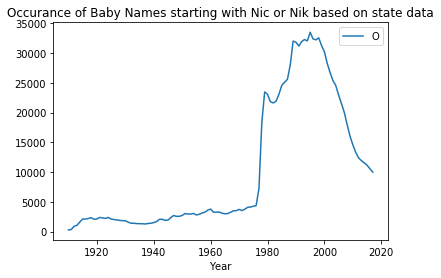

In [63]:
# replicating the graph above
#All Ni
Ni_state_sum = NistateDF_m.groupby('Year')[['Count']].sum()
Ni_state_sum = Ni_state_sum.reset_index()
#Ni_sum2 = Ni_sum.reset_index()
Ni_state_sum.tail(10)
Ni_state_sum.plot.line('Year', 'Count')
plt.legend('Occurance')
plt.title('Occurance of Baby Names starting with Nic or Nik based on state data')

### in which states do the females version of male Nic/ Nik occure ?

In [64]:
TopFiveMaleInFemaleSet = []    
NiTopFiveVector = ['Nicholas',  'Nicolas', 'Nick', 'Nickolas', 'Nikolas']
for n in NiTopFiveVector:
    FemaleNi= stateDF_f[stateDF_f['FirstName']== n ]
    TopFiveMaleInFemaleSet.append(FemaleNi)
# how to make a regular data set?
    #TopFiveMaleInFemaleSet = stateDF_f[stateDF_f['FirstName']== NiTopFiveVector ]

#stateDF_f  NiTopFiveVector
# check for top 5 male Ni names in female data set
#for n in NiTopFiveVector:
  #  NiName = NiTopFiveVector[n]
 #   NiDF_f = NiData_f[NiData_f['FirstName']== n ]
  #  plt.plot(NiDF_f['year'], NiDF_f['Count'].values )
    #NiData.append(NiDF)
#plt.plot(Ni_sum2['year'], Ni_sum2['Count'].values)   
#plt.plot(Ni_otherVer_2['year'], Ni_otherVer_2['Count'])
#lt.plot(Ni_otherVer_2['year'], Ni_otherVer_2['Count'].values)
#plt.legend(NiTopFiveVector)
#plt.title('Occurance of Baby Names starting with Nic or Nik for females')

In [65]:
FemaleNicholas = TopFiveMaleInFemaleSet[0]
FemaleNicholas.sort_values('Year')

,Sex,Year,FirstName,Count,State
3567984,F,1926,Nicholas,5,NY
3568794,F,1927,Nicholas,5,NY
3571000,F,1930,Nicholas,8,NY
3572678,F,1932,Nicholas,5,NY
3593643,F,1954,Nicholas,5,NY
3614241,F,1968,Nicholas,6,NY
1572151,F,1978,Nicholas,5,IL
452705,F,1978,Nicholas,16,CA
3632039,F,1978,Nicholas,8,NY
4117409,F,1978,Nicholas,11,OH


In [111]:
FemaleNicholas.sort_values('Count', ascending = False).head(10)

,Sex,Year,FirstName,Count,State
2108771,F,2004,Nicholas,48,KY
498272,F,1993,Nicholas,27,CA
462729,F,1982,Nicholas,26,CA
494681,F,1992,Nicholas,23,CA
483609,F,1989,Nicholas,23,CA
468393,F,1984,Nicholas,19,CA
477231,F,1987,Nicholas,19,CA
457639,F,1980,Nicholas,18,CA
465692,F,1983,Nicholas,18,CA
491275,F,1991,Nicholas,16,CA


### sampling inspection

#### KY 

In [125]:
FemaleNicholas[FemaleNicholas['State']=='KY']

,Sex,Year,FirstName,Count,State
2108771,F,2004,Nicholas,48,KY


In [136]:
NiKYDF_m = NistateDF_m[NistateDF_m['State']=='KY']
NicholasKY = NiKYDF_m[NiKYDF_m['FirstName']=='Nicholas'] 
NicholasKY.iloc[75:85,:]

,Sex,Year,FirstName,Count,State
2159858,M,1998,Nicholas,341,KY
2160348,M,1999,Nicholas,328,KY
2160856,M,2000,Nicholas,337,KY
2161400,M,2001,Nicholas,295,KY
2161930,M,2002,Nicholas,298,KY
2162491,M,2003,Nicholas,250,KY
2163065,M,2004,Nicholas,185,KY
2163765,M,2005,Nicholas,193,KY
2164359,M,2006,Nicholas,206,KY
2164992,M,2007,Nicholas,194,KY


#### CA

In [141]:
FemaleNicholas[FemaleNicholas['State']=='CA'].sort_values('Count', ascending = False).head(10)

,Sex,Year,FirstName,Count,State
498272,F,1993,Nicholas,27,CA
462729,F,1982,Nicholas,26,CA
483609,F,1989,Nicholas,23,CA
494681,F,1992,Nicholas,23,CA
477231,F,1987,Nicholas,19,CA
468393,F,1984,Nicholas,19,CA
457639,F,1980,Nicholas,18,CA
465692,F,1983,Nicholas,18,CA
491275,F,1991,Nicholas,16,CA
452705,F,1978,Nicholas,16,CA


In [145]:
NiCADF_m = NistateDF_m[NistateDF_m['State']=='CA']
NicholasCA = NiCADF_m[NiCADF_m['FirstName']=='Nicholas'] 
NicholasCA.iloc[71:85,:]

,Sex,Year,FirstName,Count,State
656008,M,1982,Nicholas,2226,CA
657835,M,1983,Nicholas,2283,CA
659684,M,1984,Nicholas,2453,CA
661562,M,1985,Nicholas,2632,CA
663526,M,1986,Nicholas,2654,CA
665587,M,1987,Nicholas,2671,CA
667703,M,1988,Nicholas,3075,CA
669950,M,1989,Nicholas,3276,CA
672356,M,1990,Nicholas,3466,CA
674874,M,1991,Nicholas,3200,CA


#### the female Nicholas do occure when there are also male Nicholas. Thus there are either girls named Nicholas or some counties in KY and CA messed up the gender

### states with the biggest increase in Nic/Nik in 1978

In [159]:
Ni1977DF_m = NistateDF_m[NistateDF_m['Year']== 1977]
Nicholas1977 = Ni1977DF_m[Ni1977DF_m['FirstName']=='Nicholas'] 
Nicholas1977.sort_values(by=['Count'], ascending=False).head(10)

,Sex,Year,FirstName,Count,State
647908,M,1977,Nicholas,674,CA
3776725,M,1977,Nicholas,523,NY
1682574,M,1977,Nicholas,402,IL
4211861,M,1977,Nicholas,370,OH
4608845,M,1977,Nicholas,326,PA
2731460,M,1977,Nicholas,308,MI
5879417,M,1977,Nicholas,247,WI
2858923,M,1977,Nicholas,226,MN
5253616,M,1977,Nicholas,210,TX
3444501,M,1977,Nicholas,208,NJ


In [160]:
Nicholas1977['Count'].sum()

6081

In [157]:
Ni1978DF_m = NistateDF_m[NistateDF_m['Year']== 1978]
Nicholas1978 = Ni1978DF_m[Ni1978DF_m['FirstName']=='Nicholas'] 
Nicholas1978.sort_values(by=['Count'], ascending=False).head(10)

,Sex,Year,FirstName,Count,State
649384,M,1978,Nicholas,1764,CA
3777984,M,1978,Nicholas,1049,NY
4212603,M,1978,Nicholas,1039,OH
1683531,M,1978,Nicholas,975,IL
2732202,M,1978,Nicholas,891,MI
4609552,M,1978,Nicholas,733,PA
5254775,M,1978,Nicholas,710,TX
5879854,M,1978,Nicholas,688,WI
1841081,M,1978,Nicholas,570,IN
2859305,M,1978,Nicholas,562,MN


In [156]:
Nicholas1978['Count'].sum()

16354

In [161]:
Ni1979DF_m = NistateDF_m[NistateDF_m['Year']== 1979]
Nicholas1979 = Ni1979DF_m[Ni1979DF_m['FirstName']=='Nicholas'] 
Nicholas1979.sort_values(by=['Count'], ascending=False).head(10)

,Sex,Year,FirstName,Count,State
650901,M,1979,Nicholas,2081,CA
4213344,M,1979,Nicholas,1389,OH
1684520,M,1979,Nicholas,1369,IL
2732944,M,1979,Nicholas,1260,MI
3779257,M,1979,Nicholas,1256,NY
5880289,M,1979,Nicholas,915,WI
4610290,M,1979,Nicholas,911,PA
5256023,M,1979,Nicholas,883,TX
2859700,M,1979,Nicholas,759,MN
1841621,M,1979,Nicholas,705,IN


In [162]:
Nicholas1979['Count'].sum()

21344

#### The reason for this might be....






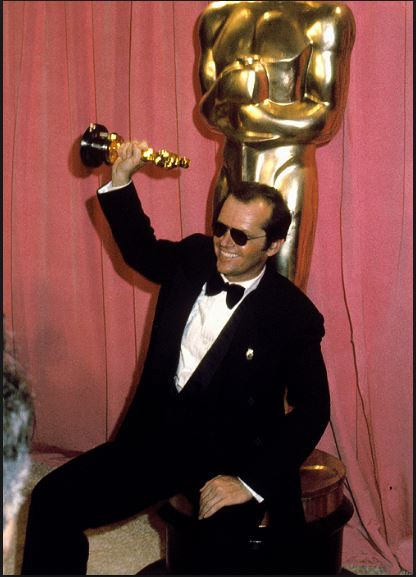

In [168]:
#



Image(filename = "Nicholson_Oscar.jpg")  
#copy rights : https://www.pinterest.de/pin/11962755237172667/

#### Jack Nicholson wins Oscar in 1976